## 目标：掌握利用合成方法来选择预测因子；


## 要求：通过实习，掌握短期气候预测因子的分析和选择，加深对夏季降水分布、环流异常、海温场异常等短期气候预测中物理机制的认识；熟悉资料和方法；独立进行绘图输出和文字分析，完成实习报告。


In [6]:
import pandas as pd
import numpy as np

In [7]:
#6月份降水
f_pre_6= pd.read_csv(r"D:\data\short_term_climate_class\sx05\r1606.txt" ,sep="\s+",header=None)
pre_6=np.array(f_pre_6).reshape(71,160)
pre_6

array([[ 78,  30,   7, ...,  21,  28,  45],
       [ 78,  67,  31, ...,  21,  54,  88],
       [ 78,  97,  74, ...,  30,  41,   8],
       ...,
       [ 19, 114,  45, ...,  11,  40,  15],
       [ 81,  71,  34, ...,  14,   9,  37],
       [111, 120,  38, ...,   5,  18,  21]], dtype=int64)

In [8]:
#7月份降水
f_pre_7= pd.read_csv(r"D:\data\short_term_climate_class\sx05\r1607.txt" ,sep="\s+",header=None)
pre_7=np.array(f_pre_7).reshape(71,160)
pre_7

array([[108, 111,  23, ...,  22,  26,   4],
       [108, 135,  51, ...,  22,   3,  19],
       [108, 117, 123, ...,   4,   9,  17],
       ...,
       [224, 236, 106, ...,   7,  13,   6],
       [226, 141,  90, ...,  17,  11,  24],
       [154, 163, 175, ...,  10,  11,  15]], dtype=int64)

In [9]:
#8月份降水
f_pre_8= pd.read_csv(r"D:\data\short_term_climate_class\sx05\r1608.txt" ,sep="\s+",header=None)
pre_8=np.array(f_pre_8).reshape(71,160)
pre_8[54,:]

array([ 53,  14,  34,  13,  40,  46,  99,  42, 103, 159,  58, 108,  62,
        90, 130, 119, 291, 191, 121, 146, 330, 185,  36,  10,  32,  64,
        72, 224,  81,  92,  75,  25, 123, 208, 102, 109, 135,  74, 144,
       257, 105, 161, 215, 101, 333, 446, 186, 239, 426, 118, 291, 259,
       312, 215, 213, 307, 133, 188, 137,  35,  93, 293, 102, 251, 178,
       271,  60, 226,  87,  97, 134,  34,  47, 153,  70, 155, 142,  43,
        64,  84, 105, 339, 223, 394, 125, 142, 252, 264, 310, 231,  90,
       205, 150, 122, 371, 182, 211, 118, 107, 180,  50, 198, 249, 170,
       224, 318, 222, 128, 212, 167, 334, 249, 187, 197, 280, 253, 216,
       242, 354, 204, 245, 155,  75, 112, 167, 127,  76,  86, 118, 225,
       336, 107,  78,  89,  85,  48,  44,  17,   8,  20, 106, 126,  84,
       161,  31,  38,  20,   2,   4,   6,  21,   9,  12,  52,   8,  61,
        40,  13,  35,  87], dtype=int64)

In [10]:
pre=((pre_6+pre_7+pre_8)/3.)[0:55,:]
pre

array([[ 99.        , 110.66666667,  39.        , ...,  20.33333333,
         23.        ,  16.33333333],
       [ 99.        , 119.        ,  67.        , ...,  20.33333333,
         22.33333333,  38.66666667],
       [ 99.        ,  90.33333333,  93.        , ...,  16.        ,
         20.66666667,  27.33333333],
       ...,
       [132.33333333, 124.66666667,  66.66666667, ...,  14.66666667,
         19.66666667,  50.66666667],
       [ 91.66666667,  51.66666667,  62.        , ...,  18.66666667,
         62.66666667,  45.33333333],
       [ 55.        ,  81.        ,  65.        , ...,  11.66666667,
         28.        ,  44.33333333]])

In [11]:
#站点
sta= pd.read_csv(r"D:\data\short_term_climate_class\sx05\zd.txt", sep="\s+",header=None,names=['station','lat','lon'])  
sta['lat']

0      51.72
1      48.77
2      49.22
3      50.45
4      49.17
       ...  
155    47.73
156    46.73
157    44.43
158    43.95
159    43.78
Name: lat, Length: 160, dtype: float64

In [12]:
type_1_year=np.array([1953,1958,1959,1960,1961,1964,1966,1967,1973,1976,1977,1978,1981,1985,1988,1992,1994,1995,2001,2004])
type_2_year=np.array([1956,1957,1962,1963,1965,1971,1972,1975,1979,1982,1984,1989,1990,1991,2000,2003,2005])
type_3_year=np.array([1951,1952,1954,1955,1968,1969,1970,1974,1980,1983,1986,1987,1993,1996,1997,1998,1999,2002])
type_1_year.shape

(20,)

In [13]:
type_1_year_pre=pre[type_1_year-1951]
type_1_year_pre.shape

(20, 160)

In [14]:
(pre[0:50,:]).mean(0).shape

(160,)

In [15]:
ave_pre=np.tile((pre[0:50,:]).mean(0),(type_1_year_pre.shape[0],1))
ave_pre.shape

(20, 160)

In [16]:
pre_per_1=((type_1_year_pre-ave_pre)/ave_pre).mean(0)
(pre_per_1).shape

(160,)

In [127]:
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.util import add_cyclic_point
from scipy.stats import pearsonr
from scipy.signal import detrend
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.path as mpath
#防止中文出错
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

(-180.0, 180.0)

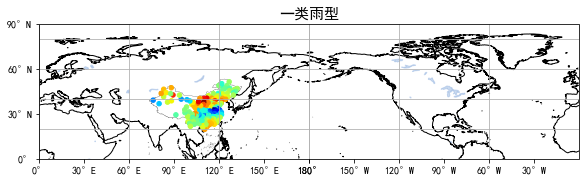

In [128]:
from matplotlib import pyplot as plt
import matplotlib

# 防止中文出错
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
plt.rcParams['axes.unicode_minus'] = False

fig2 = plt.figure(figsize=(15,15))
proj = ccrs.PlateCarree(central_longitude=180) 
leftlon, rightlon, lowerlat, upperlat = (-180,180,-90,90)
#绘制地图
f2_ax1 = fig2.add_axes([0.1, 0.1, 0.5, 0.3],projection = proj)
#在画布的绝对坐标建立子图
#f2_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
#海岸线，50m精度
f2_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
#湖泊数据(但是这个貌似只画了比较大的湖泊，比如贝湖巴湖)
f2_ax1.add_feature(cfeature.LAKES, alpha=0.5)
f2_ax1.gridlines()
#以下6条语句是定义地理坐标标签格式
f2_ax1.set_ylim((0,90))
f2_ax1.set_xticks(np.arange(leftlon,rightlon+30,30), crs=ccrs.PlateCarree())
f2_ax1.set_yticks(np.arange(0,upperlat+30,30), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
f2_ax1.xaxis.set_major_formatter(lon_formatter)
f2_ax1.yaxis.set_major_formatter(lat_formatter)
f2_ax1.set_title('一类雨型',loc='center',fontsize =15)
f2_ax1.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.2)
f2_ax1.scatter(sta["lon"],sta["lat"],s =20,c=pre_per_1,cmap='jet',transform=ccrs.PlateCarree())
f2_ax1.set_xlim([-180,180])

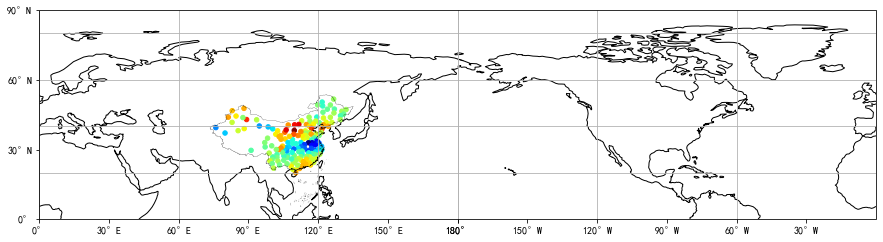

In [129]:
fig = plt.figure(figsize=(15,15))
proj = ccrs.PlateCarree(central_longitude=180) 
f2_ax1 =fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))
#c_map(f2_ax1, [-180,180 ,0, 90], 30, 1, 14)
f2_ax1.coastlines(resolution='110m')
f2_ax1.gridlines()
f2_ax1.set_xticks(np.arange(leftlon,rightlon+30,30), crs=ccrs.PlateCarree())
f2_ax1.set_yticks(np.arange(lowerlat,upperlat+30,30), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
f2_ax1.xaxis.set_major_formatter(lon_formatter)
f2_ax1.yaxis.set_major_formatter(lat_formatter)
f2_ax1.set_ylim((0,90))
f2_ax1.set_xlim((-180,180))
f2_ax1.scatter(sta["lon"],sta["lat"],s =20,c=pre_per_1,cmap='jet',transform=ccrs.PlateCarree())
f2_ax1.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.2)

In [130]:
#计算雨型
def cal_pre(type_year,pre):
    type_year_pre=pre[type_year-1951]
    ave_pre=np.tile((pre[0:50,:]).mean(0),(type_year_pre.shape[0],1))
    pre_per=((type_year_pre-ave_pre)/ave_pre).mean(0)
    return pre_per
pre_per_1=cal_pre(type_1_year,pre)
pre_per_2=cal_pre(type_2_year,pre)
pre_per_3=cal_pre(type_3_year,pre)

In [131]:
# 散点图底图
def c_map(ax, img_extent, spec, a, size=None):
    proj = ccrs.PlateCarree()
    ax.set_extent(img_extent, crs=proj)
    if a == 1:
        ax.set_xticks(np.arange(img_extent[0], img_extent[1] + spec, spec),
                      crs=proj)
        ax.set_yticks(np.arange(img_extent[2], img_extent[3] + spec, spec),
                      crs=proj)
        lon_formatter = cticker.LongitudeFormatter()
        lat_formatter = cticker.LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        plt.xticks(fontsize=size)  # 设置标签大小
        plt.yticks(fontsize=size)
    else:

        pass

    #ax.add_feature(cfeature.OCEAN.with_scale('50m'))#海洋
    #ax.add_feature(cfeature.LAND.with_scale('50m'))#陆地
    ax.add_feature(cfeature.LAKES.with_scale('50m'))  #湖泊
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))

    ax.add_geometries(Reader(r'D:\data\china_map\river1.shp').geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='b',
                      linewidth=0.4)  #长江黄河
    ax.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='k',
                      linewidth=0.5)  #详细国界中国国界
    ax.add_geometries(Reader(r"D:\data\map\bou2_4l.shp").geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='k',
                      linewidth=0.7)  #省界
    ax.add_geometries(
        Reader(r'D:\data\china_map\ne_10m_land.shp').geometries(),
        ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='k',
        linewidth=0.4)  #海岸线
    ax.add_geometries(
        Reader(r'D:\data\china_map\ne_50m_lakes.shp').geometries(),
        ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='k',
        linewidth=0.3)  #湖泊

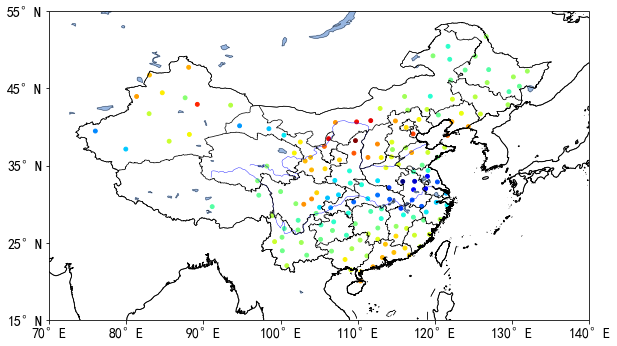

In [132]:
#底图
fig2 = plt.figure(figsize=(15,15))
proj = ccrs.PlateCarree(central_longitude=105) 
f2_ax1 = fig2.add_axes([0.1, 0.1, 0.5, 0.3],projection = proj)
f2_ax1.scatter(sta["lon"],sta["lat"],s =15,c=pre_per_1,cmap='jet',transform=ccrs.PlateCarree())
c_map(f2_ax1, [70, 140, 15, 55], 10, 1, 14)

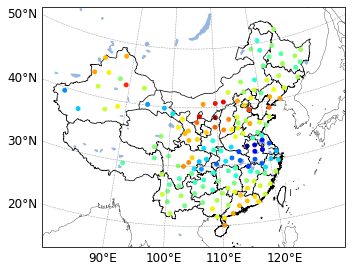

In [34]:
import matplotlib.ticker as mticker
fig = plt.figure(figsize=(15,15))
map=ccrs.LambertConformal(central_longitude=105)
ax = fig.add_subplot(3,2,1, projection=map)
#ax=fig.add_axes([0.1, 0.1, 0.5, 0.3],projection=map)

plt.rcParams['font.size']=12    #设置显示字体大小
plt.tick_params(labelsize=12)   #设置坐标轴字体大小
plt.rcParams['font.family']='DejaVu Sans'    #设置默认字体
ax.set_extent([80, 130, 15, 55])
ax.add_feature(cfeature.COASTLINE,lw=0.3) 
ax.add_feature(cfeature.LAKES.with_scale('50m'))
# ax.add_geometries(Reader(r"D:\data\china_map\river1.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='b',linewidth=0.5)
# ax.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
ax.add_geometries(Reader(r"D:\data\map\bou2_4l.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.7)
#ax.add_geometries(Reader(r'D:\data\china_map\ne_10m_land.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
#ax.add_geometries(Reader(r'D:\data\china_map\ne_50m_lakes.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
# lb=ax.gridlines(draw_labels=None,x_inline=False, y_inline=False,linewidth=0.5, color='gray', alpha=0.8, linestyle='--' )
# lb.xlocator = mticker.FixedLocator(range(0,180,1))
# lb.ylocator = mticker.FixedLocator(range(0,90,1))

lb=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False,linewidth=0.5, color='gray', alpha=0.8, linestyle='--' )
lb.top_labels = False
lb.right_labels = None
lb.xlocator = mticker.FixedLocator(range(90, 130, 10))
lb.ylocator = mticker.FixedLocator(range(10, 60, 10))
lb.ylabel_style = {'size': 12, 'color': 'k'}
lb.xlabel_style = {'size': 12, 'color': 'k' }
lb.rotate_labels = False
ax.scatter(sta["lon"],sta["lat"],s =15,c=pre_per_1,cmap='jet',transform=ccrs.PlateCarree())

In [112]:
def Lbt_map(ax,extent,mark=1):
    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE,lw=0.3) 
    ax.add_feature(cfeature.LAKES.with_scale('50m'))
    #ax.add_geometries(Reader(r"D:\data\china_map\river1.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='b',linewidth=0.6)
    #ax.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
    ax.add_geometries(Reader(r"D:\data\map\bou2_4l.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.7)
    #ax.add_geometries(Reader(r'D:\data\china_map\ne_10m_land.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
    #ax.add_geometries(Reader(r'D:\data\china_map\ne_50m_lakes.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
    if mark==1:        
            lb=ax.gridlines(draw_labels=None,x_inline=False, y_inline=False,linewidth=0.5, color='gray', alpha=0.8, linestyle='--' )
            lb.xlocator = mticker.FixedLocator(range(0,180,10))
            lb.ylocator = mticker.FixedLocator(range(0,90,10))
            lb=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False,linewidth=0.5, color='gray', alpha=0.8, linestyle='--' )
            lb.top_labels = False
            lb.right_labels = None
            lb.xlocator = mticker.FixedLocator(range(90, 130, 10))
            lb.ylocator = mticker.FixedLocator(range(10, 60, 10))
            lb.ylabel_style = {'size': 12, 'color': 'k'}
            lb.xlabel_style = {'size': 12, 'color': 'k' }
            lb.rotate_labels = False
    else :
            pass
            
            

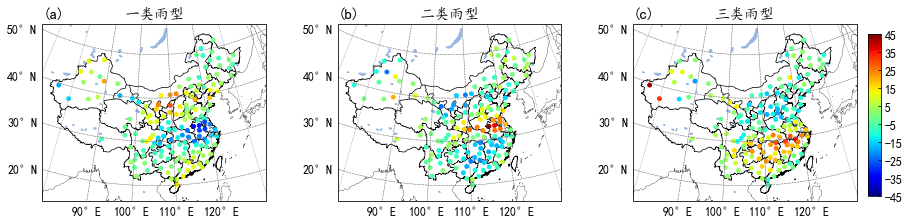

In [220]:
import matplotlib.ticker as mticker
from matplotlib import pyplot as plt
import matplotlib
# 防止中文出错
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
matplotlib.rcParams['font.family']='sans-serif'
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(15,15))
map=ccrs.LambertConformal(central_longitude=105)
ax1 = fig.add_subplot(4,3,1, projection=map)
Lbt_map(ax1,[80, 130, 15, 55],1)
c11=ax1.scatter(sta["lon"],sta["lat"],vmin=-45,vmax =45,s=15,c=pre_per_1*100,cmap='jet',transform=ccrs.PlateCarree())
ax1.set_title('一类雨型', fontsize=15)
ax1.set_title('(a)', loc='left', fontsize=15)

ax2= fig.add_subplot(4,3,2, projection=map)
Lbt_map(ax2,[80, 130, 15, 55],1)
ax2.scatter(sta["lon"],sta["lat"],vmin=-45,vmax =45,s =15,c=pre_per_2*100,cmap='jet',transform=ccrs.PlateCarree())
ax2.set_title('二类雨型', fontsize=15)
ax2.set_title('(b)', loc='left', fontsize=15)

ax3 = fig.add_subplot(4,3,3, projection=map)
Lbt_map(ax3,[80, 130, 15, 55],1)
ax3.scatter(sta["lon"],sta["lat"],vmin=-45,vmax =45,s =15,c=pre_per_3*100,cmap='jet',transform=ccrs.PlateCarree())
ax3.set_title('三类雨型', fontsize=15)
ax3.set_title('(c)', loc='left', fontsize=15)

ax=fig.add_axes([0.9,0.72,0.012,0.15])
cbar=plt.colorbar(c11,cax=ax) 
cbar.ax.tick_params(labelsize=12, direction='in')
cbar.set_ticks(np.arange(-45,45.1,10)) #设置colorbar范围和刻度标记间隔

In [82]:
np.max(pre_per_1),np.min(pre_per_1)

(0.3031555855551803, -0.35986196718465147)

In [83]:
np.max(pre_per_2),np.min(pre_per_2)

(0.4394376554337334, -0.237761329697442)

In [84]:
np.max(pre_per_3),np.min(pre_per_3)

(0.43236714975845375, -0.20235096557514692)

In [56]:
import xarray as xr

In [115]:
f_hgt=xr.open_dataset(r"D:\data\short_term_climate_class\sx05\hgt.mon.mean.nc")
f_hgt

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144, time: 892)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-04-01
Data variables:
    hgt      (time, level, lat, lon) float32 ...
Attributes:
    description:     Data from NCEP initialized reanalysis (4x/day).  These a...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Created by NOAA-CIRES Climate Diagnostics Center (SAC) fr...
    title:          monthly mean hgt from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [116]:
z=f_hgt.hgt.loc[f_hgt.time.dt.month.isin([12,1,2])].loc['1950-12-01':'2005-02-01',500,90:0,:]
hgt_1=f_hgt.hgt.loc[((f_hgt.time.dt.month.isin([1,2])) & (f_hgt.time.dt.year.isin(type_1_year)))|
                    ((f_hgt.time.dt.month.isin([12])) & (f_hgt.time.dt.year.isin(type_1_year-1)))].loc[:,500,90:0,:]
hgt_1

<xarray.DataArray 'hgt' (time: 60, lat: 37, lon: 144)>
[319680 values with dtype=float32]
Coordinates:
    level    float32 500.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1952-12-01 1953-01-01 ... 2004-02-01
Attributes:
    long_name:     Monthly mean geopotential height
    valid_range:   [ -700. 35000.]
    units:         m
    precision:     0
    GRIB_id:       7
    GRIB_name:     HGT
    var_desc:      Geopotential height
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [ -354.45834 32321.098  ]

In [117]:
z.time

<xarray.DataArray 'time' (time: 165)>
array(['1950-12-01T00:00:00.000000000', '1951-01-01T00:00:00.000000000',
       '1951-02-01T00:00:00.000000000', '1951-12-01T00:00:00.000000000',
       '1952-01-01T00:00:00.000000000', '1952-02-01T00:00:00.000000000',
       '1952-12-01T00:00:00.000000000', '1953-01-01T00:00:00.000000000',
       '1953-02-01T00:00:00.000000000', '1953-12-01T00:00:00.000000000',
       '1954-01-01T00:00:00.000000000', '1954-02-01T00:00:00.000000000',
       '1954-12-01T00:00:00.000000000', '1955-01-01T00:00:00.000000000',
       '1955-02-01T00:00:00.000000000', '1955-12-01T00:00:00.000000000',
       '1956-01-01T00:00:00.000000000', '1956-02-01T00:00:00.000000000',
       '1956-12-01T00:00:00.000000000', '1957-01-01T00:00:00.000000000',
       '1957-02-01T00:00:00.000000000', '1957-12-01T00:00:00.000000000',
       '1958-01-01T00:00:00.000000000', '1958-02-01T00:00:00.000000000',
       '1958-12-01T00:00:00.000000000', '1959-01-01T00:00:00.000000000',
       '1959-02-01T00:00:00.000000000', '1959-12-01T00:00:00.000000000',
       '1960-01-01T00:00:00.000000000', '1960-02-01T00:00:00.000000000',
       '1960-12-01T00:00:00.000000000', '1961-01-01T00:00:00.000000000',
       '1961-02-01T00:00:00.000000000', '1961-12-01T00:00:00.000000000',
       '1962-01-01T00:00:00.000000000', '1962-02-01T00:00:00.000000000',
       '1962-12-01T00:00:00.000000000', '1963-01-01T00:00:00.000000000',
       '1963-02-01T00:00:00.000000000', '1963-12-01T00:00:00.000000000',
       '1964-01-01T00:00:00.000000000', '1964-02-01T00:00:00.000000000',
       '1964-12-01T00:00:00.000000000', '1965-01-01T00:00:00.000000000',
       '1965-02-01T00:00:00.000000000', '1965-12-01T00:00:00.000000000',
       '1966-01-01T00:00:00.000000000', '1966-02-01T00:00:00.000000000',
       '1966-12-01T00:00:00.000000000', '1967-01-01T00:00:00.000000000',
       '1967-02-01T00:00:00.000000000', '1967-12-01T00:00:00.000000000',
       '1968-01-01T00:00:00.000000000', '1968-02-01T00:00:00.000000000',
       '1968-12-01T00:00:00.000000000', '1969-01-01T00:00:00.000000000',
       '1969-02-01T00:00:00.000000000', '1969-12-01T00:00:00.000000000',
       '1970-01-01T00:00:00.000000000', '1970-02-01T00:00:00.000000000',
       '1970-12-01T00:00:00.000000000', '1971-01-01T00:00:00.000000000',
       '1971-02-01T00:00:00.000000000', '1971-12-01T00:00:00.000000000',
       '1972-01-01T00:00:00.000000000', '1972-02-01T00:00:00.000000000',
       '1972-12-01T00:00:00.000000000', '1973-01-01T00:00:00.000000000',
       '1973-02-01T00:00:00.000000000', '1973-12-01T00:00:00.000000000',
       '1974-01-01T00:00:00.000000000', '1974-02-01T00:00:00.000000000',
       '1974-12-01T00:00:00.000000000', '1975-01-01T00:00:00.000000000',
       '1975-02-01T00:00:00.000000000', '1975-12-01T00:00:00.000000000',
       '1976-01-01T00:00:00.000000000', '1976-02-01T00:00:00.000000000',
       '1976-12-01T00:00:00.000000000', '1977-01-01T00:00:00.000000000',
       '1977-02-01T00:00:00.000000000', '1977-12-01T00:00:00.000000000',
       '1978-01-01T00:00:00.000000000', '1978-02-01T00:00:00.000000000',
       '1978-12-01T00:00:00.000000000', '1979-01-01T00:00:00.000000000',
       '1979-02-01T00:00:00.000000000', '1979-12-01T00:00:00.000000000',
       '1980-01-01T00:00:00.000000000', '1980-02-01T00:00:00.000000000',
       '1980-12-01T00:00:00.000000000', '1981-01-01T00:00:00.000000000',
       '1981-02-01T00:00:00.000000000', '1981-12-01T00:00:00.000000000',
       '1982-01-01T00:00:00.000000000', '1982-02-01T00:00:00.000000000',
       '1982-12-01T00:00:00.000000000', '1983-01-01T00:00:00.000000000',
       '1983-02-01T00:00:00.000000000', '1983-12-01T00:00:00.000000000',
       '1984-01-01T00:00:00.000000000', '1984-02-01T00:00:00.000000000',
       '1984-12-01T00:00:00.000000000', '1985-01-01T00:00:00.000000000',
       '1985-02-01T00:00:00.000000000', '1985-12-01T00:00:00.000000000',
       '1986-01-01T00:00:00.000000000', '1986-02-01T00:00:00.000000000',
       '1986-12-01T0

In [118]:
z.loc['1950-12-01':'2000-02-01']

<xarray.DataArray 'hgt' (time: 150, lat: 37, lon: 144)>
[799200 values with dtype=float32]
Coordinates:
    level    float32 500.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1950-12-01 1951-01-01 ... 2000-02-01
Attributes:
    long_name:     Monthly mean geopotential height
    valid_range:   [ -700. 35000.]
    units:         m
    precision:     0
    GRIB_id:       7
    GRIB_name:     HGT
    var_desc:      Geopotential height
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [ -354.45834 32321.098  ]

In [119]:
ave_z=(np.array(z.loc['1950-12-01':'2000-02-01']).reshape(50,3,37,144).mean(1)).mean(0)
ave_z.shape

(37, 144)

In [120]:
hgt_1_winter=(np.array(hgt_1).reshape(20,3,37,144).mean(1)).mean(0)
hgt_jp=hgt_1_winter-ave_z
hgt_jp

array([[4.9819336, 4.9819336, 4.9819336, ..., 4.9819336, 4.9819336,
        4.9819336],
       [3.161621 , 3.1030273, 3.0424805, ..., 3.3666992, 3.307129 ,
        3.2285156],
       [2.5507812, 2.465332 , 2.3710938, ..., 2.7954102, 2.7207031,
        2.6450195],
       ...,
       [3.0820312, 3.0205078, 2.9238281, ..., 2.9672852, 3.022461 ,
        3.0751953],
       [3.1455078, 3.0874023, 2.9648438, ..., 3.0932617, 3.1054688,
        3.137207 ],
       [3.1225586, 3.0595703, 2.9492188, ..., 3.165039 , 3.1513672,
        3.145996 ]], dtype=float32)

In [121]:
from scipy.stats.mstats import ttest_ind
def cal_hgt(type_year,z):
        ave_z=(np.array(z).reshape(-1,3,37,144).mean(1)).mean(0)
        hgt=z.loc[((z.time.dt.month.isin([1,2])) & (z.time.dt.year.isin(type_year)))|
                    ((z.time.dt.month.isin([12])) & (z.time.dt.year.isin(type_year-1)))]
        hgt_winter=(np.array(hgt).reshape(-1,3,37,144).mean(1)).mean(0)
        hgt_jp=hgt_winter-ave_z
        _,p_hgt = ttest_ind(hgt,z,equal_var=False)
        return hgt_jp,p_hgt
hgt_1_winter,p_hgt_1=cal_hgt(type_1_year,z)
hgt_2_winter,p_hgt_2=cal_hgt(type_2_year,z)
hgt_3_winter,p_hgt_3=cal_hgt(type_3_year,z)

In [122]:
hgt_3_winter.shape,z.shape

((37, 144), (165, 37, 144))

In [138]:
def contour_map(fig, img_extent, spec):  # 画布，经纬度范围，步长
    #fig.set_extent(img_extent, crs=ccrs.PlateCarree())
    fig.add_feature(cfeature.COASTLINE.with_scale('50m'))  # 添加海岸线
    fig.add_feature(cfeature.LAKES, alpha=0.5)  # 添加湖泊
    # 添加经纬度
    fig.set_xticks(np.arange(leftlon, rightlon + spec, spec), crs=ccrs.PlateCarree())
    fig.set_yticks(np.arange(lowerlat, upperlat + spec, spec), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    fig.xaxis.set_major_formatter(lon_formatter)
    fig.yaxis.set_major_formatter(lat_formatter)
    fig.set_ylim((lowerlat, upperlat))
    fig.set_xlim((leftlon, rightlon))
    

(0.0, 90.0)

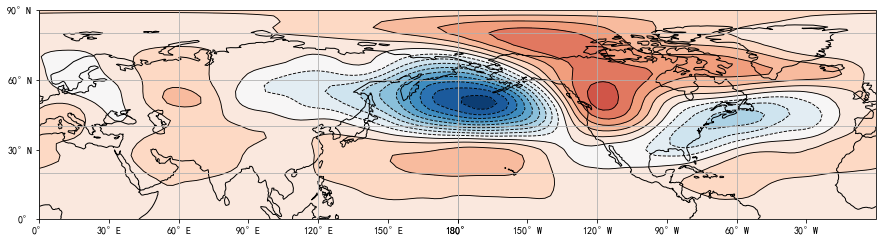

In [139]:
fig = plt.figure(figsize=(15,15))
proj = ccrs.PlateCarree(central_longitude=180) 
f2_ax1 =fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))
c3 = f2_ax1.contourf(LON, LAT,chgt_1,levels=np.arange(-40, 40, 4), cmap='RdBu_r', transform=ccrs.PlateCarree())
c11 = f2_ax1.contour(LON, LAT,chgt_1,levels=np.arange(-40, 40, 4), colors='black', linewidths=0.9, transform=ccrs.PlateCarree())
#c_map(f2_ax1, [-180,180 ,0, 90], 30, 1, 14)
f2_ax1.coastlines(resolution='110m')
f2_ax1.gridlines()
f2_ax1.set_xticks(np.arange(leftlon,rightlon+30,30), crs=ccrs.PlateCarree())
f2_ax1.set_yticks(np.arange(lowerlat,upperlat+30,30), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
f2_ax1.xaxis.set_major_formatter(lon_formatter)
f2_ax1.yaxis.set_major_formatter(lat_formatter)
f2_ax1.set_ylim((0,90))


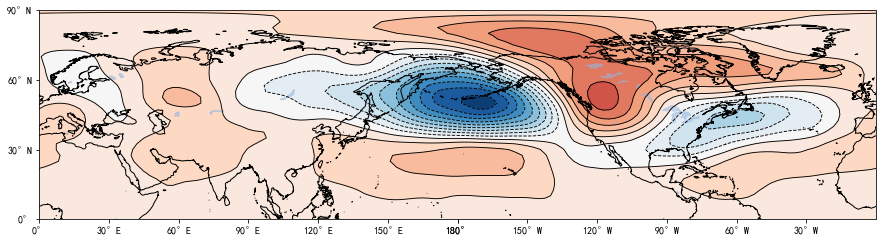

In [140]:
from cartopy.util import add_cyclic_point
chgt_1, cycle_lon = add_cyclic_point(hgt_jp, coord=z.lon)
LON, LAT = np.meshgrid(cycle_lon, z.lat)
fig = plt.figure(figsize=(15,15))
proj = ccrs.PlateCarree(central_longitude=180) 
f2_ax1 =fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))
c3 = f2_ax1.contourf(LON, LAT,chgt_1,levels=np.arange(-40, 40, 4), cmap='RdBu_r', transform=ccrs.PlateCarree())
c11 = f2_ax1.contour(LON, LAT,chgt_1,levels=np.arange(-40, 40, 4), colors='black', linewidths=0.9, transform=ccrs.PlateCarree())
contour_map(f2_ax1,[-180,180,0,90],30)

C:\Users\Serein\AppData\Local\Temp\ipykernel_18844\1902065677.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


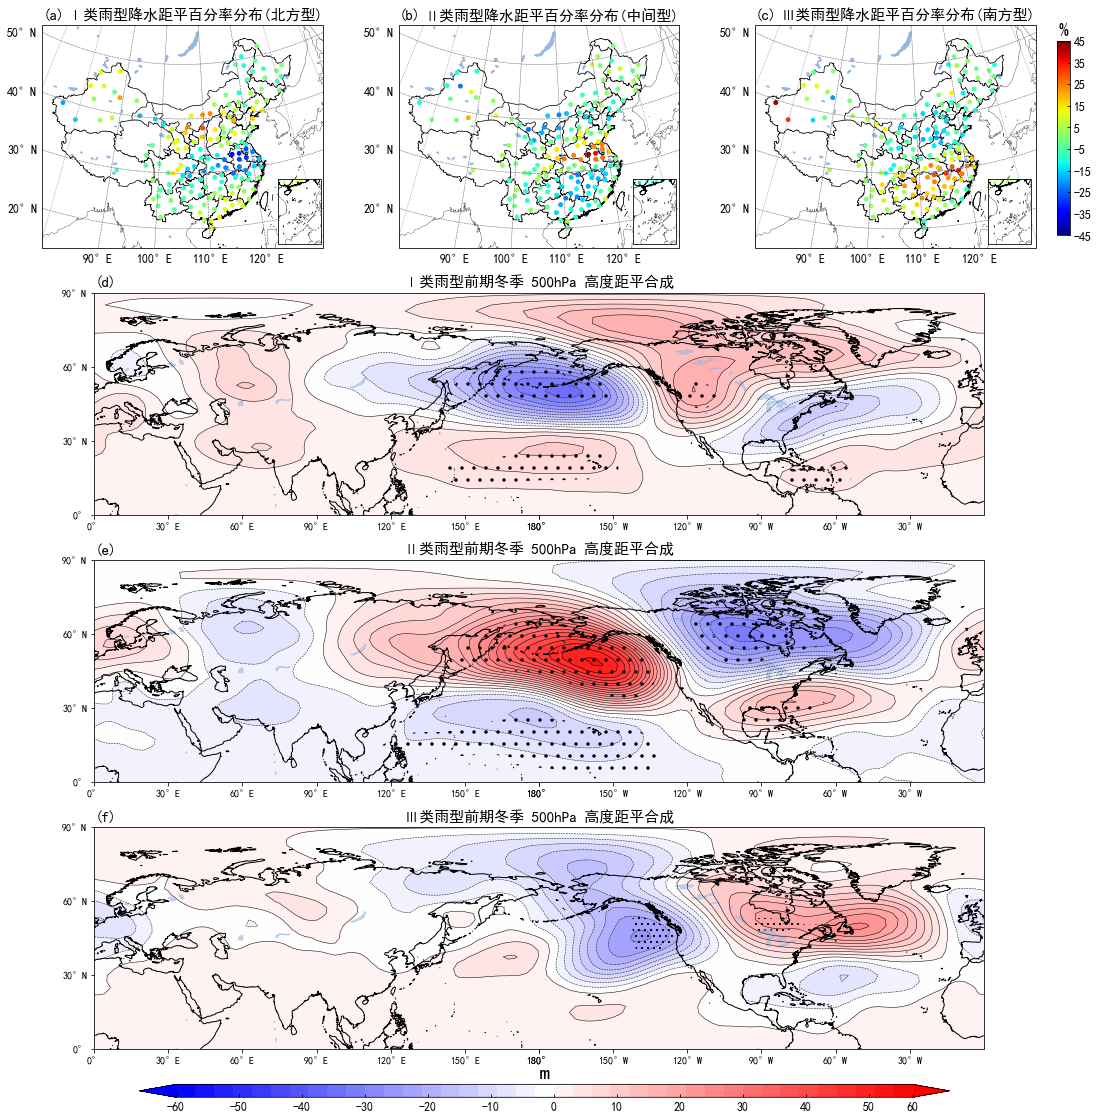

In [141]:
import matplotlib.ticker as mticker
def cycle_data(hgt_jp,z):
    
    chgt, cycle_lon = add_cyclic_point(hgt_jp, coord=z.lon)
    LON, LAT = np.meshgrid(cycle_lon, z.lat)
    return LON,LAT,chgt
c_hgt_1_lon,c_hgt_1_lat,c_hgt_1=cycle_data(hgt_1_winter,z)
c_hgt_2_lon,c_hgt_2_lat,c_hgt_2=cycle_data(hgt_2_winter,z)
c_hgt_3_lon,c_hgt_3_lat,c_hgt_3=cycle_data(hgt_3_winter,z)


leftlon, rightlon, lowerlat, upperlat = (-180, 180, 0, 90)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lev=np.arange(-60, 60, 3)
fig = plt.figure(figsize=(15,15))
#降水
map=ccrs.LambertConformal(central_longitude=105)
ax1 = fig.add_subplot(4,3,1, projection=map)
Lbt_map(ax1,[80, 130, 15, 55],1)
c11=ax1.scatter(sta["lon"],sta["lat"],vmin=-45,vmax =45,s=15,c=pre_per_1*100,cmap='jet',transform=ccrs.PlateCarree())
ax1.set_title('Ⅰ类雨型降水距平百分率分布(北方型)',loc='right',fontsize=15)
ax1.set_title('(a)', loc='left', fontsize=15)

ax2= fig.add_subplot(4,3,2, projection=map)
Lbt_map(ax2,[80, 130, 15, 55],1)
ax2.scatter(sta["lon"],sta["lat"],vmin=-45,vmax =45,s =15,c=pre_per_2*100,cmap='jet',transform=ccrs.PlateCarree())
ax2.set_title('Ⅱ类雨型降水距平百分率分布(中间型)', loc='right',fontsize=15)
ax2.set_title('(b)', loc='left', fontsize=15)

ax3 = fig.add_subplot(4,3,3, projection=map)
Lbt_map(ax3,[80, 130, 15, 55],1)
ax3.scatter(sta["lon"],sta["lat"],vmin=-45,vmax =45,s =15,c=pre_per_3*100,cmap='jet',transform=ccrs.PlateCarree())
ax3.set_title('Ⅲ类雨型降水距平百分率分布(南方型)',loc='right',fontsize=15)
ax3.set_title('(c)', loc='left', fontsize=15)

ax=fig.add_axes([0.98,0.778,0.012,0.18])
cbar=plt.colorbar(c11,cax=ax) 
cbar.ax.tick_params(labelsize=12, direction='in')
cbar.set_ticks(np.arange(-45,45.1,10))
cbar.ax.set_title('%',fontsize=20)

#南海
ax_nh1 = fig.add_axes([0.208, 0.770, 0.14, 0.06], projection=ccrs.PlateCarree())
ax_nh1.scatter(sta["lon"],sta["lat"],vmin=-45,vmax =45,s=5,c=pre_per_1*100,cmap='jet',transform=ccrs.PlateCarree())
Lbt_map(ax_nh1, [106, 122, 0, 24],0)

ax_nh2 = fig.add_axes([0.537, 0.770, 0.14, 0.06], projection=ccrs.PlateCarree())
ax_nh2.scatter(sta["lon"],sta["lat"],vmin=-45,vmax =45,s=5,c=pre_per_2*100,cmap='jet',transform=ccrs.PlateCarree())
Lbt_map(ax_nh2, [106, 122, 0, 24],0)

ax_nh3 = fig.add_axes([0.866, 0.770, 0.14, 0.06], projection=ccrs.PlateCarree())
ax_nh3.scatter(sta["lon"],sta["lat"],vmin=-45,vmax =45,s=5,c=pre_per_3*100,cmap='jet',transform=ccrs.PlateCarree())
Lbt_map(ax_nh3, [106, 122, 0, 24],0)
#500hPa
f_ax1 =fig.add_subplot(4,1,2,projection=ccrs.PlateCarree(central_longitude=180))
c1=f_ax1.contourf(c_hgt_1_lon,c_hgt_1_lat,c_hgt_1,levels=lev, cmap='bwr', transform=ccrs.PlateCarree())
f_ax1.contour(c1, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())
c1p = f_ax1.contourf(z.lon,z.lat,p_hgt_1 ,levels =[0,0.05,1],hatches=['.', None],colors="none", transform=ccrs.PlateCarree())
contour_map(f_ax1,img_extent , 30)
f_ax1.set_title('Ⅰ类雨型前期冬季 500hPa 高度距平合成', fontsize=15)
f_ax1.set_title('(d)', loc='left', fontsize=15)

f_ax2 =fig.add_subplot(4,1,3,projection=ccrs.PlateCarree(central_longitude=180))
c2=f_ax2.contourf(c_hgt_2_lon,c_hgt_2_lat,c_hgt_2,levels=lev, cmap='bwr', transform=ccrs.PlateCarree())
f_ax2.contour(c2, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())
c2p = f_ax2.contourf(z.lon,z.lat,p_hgt_2 ,levels =[0,0.05,1],hatches=['.', None],colors="none", transform=ccrs.PlateCarree())
contour_map(f_ax2,img_extent , 30)
f_ax2.set_title('Ⅱ类雨型前期冬季 500hPa 高度距平合成', fontsize=15)
f_ax2.set_title('(e)', loc='left', fontsize=15)

f_ax3 =fig.add_subplot(4,1,4,projection=ccrs.PlateCarree(central_longitude=180))
c3=f_ax3.contourf(c_hgt_3_lon,c_hgt_3_lat,c_hgt_3,levels=lev, cmap='bwr', transform=ccrs.PlateCarree(),extend='both',)
f_ax3.contour(c3, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())
c3p = f_ax3.contourf(z.lon,z.lat,p_hgt_3 ,levels =[0,0.05,1],hatches=['..', None],colors="none", transform=ccrs.PlateCarree())
contour_map(f_ax3,img_extent , 30)
f_ax3.set_title('Ⅲ类雨型前期冬季 500hPa 高度距平合成', fontsize=15)
f_ax3.set_title('(f)', loc='left', fontsize=15)
axc=fig.add_axes([0.13,-0.02,0.75,0.012])
cbar=plt.colorbar(c3,cax=axc,orientation='horizontal') 
cbar.ax.tick_params(labelsize=12, direction='in')
cbar.set_ticks(np.arange(-60, 60.1, 10))
cbar.ax.set_title('m',fontsize=20)
plt.tight_layout()
plt.savefig(r'D:\data\short_term_climate_class\sx05\pre.jpg',dpi=300,bbox_inches='tight')
plt.show()

In [118]:
np.max(c_hgt_1),np.min(c_hgt_1)

(21.936035, -37.856445)

In [119]:
np.max(c_hgt_2),np.min(c_hgt_2)

(50.479492, -29.65039)

In [120]:
np.max(c_hgt_3),np.min(c_hgt_3)

(23.958008, -23.893555)

In [183]:
np.max(p_hgt_3),np.min(p_hgt_3)

(0.9998658021533963, 0.02693386790251842)

# 完整代码

C:\Users\Serein\AppData\Local\Temp\ipykernel_18844\3899107839.py:327: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


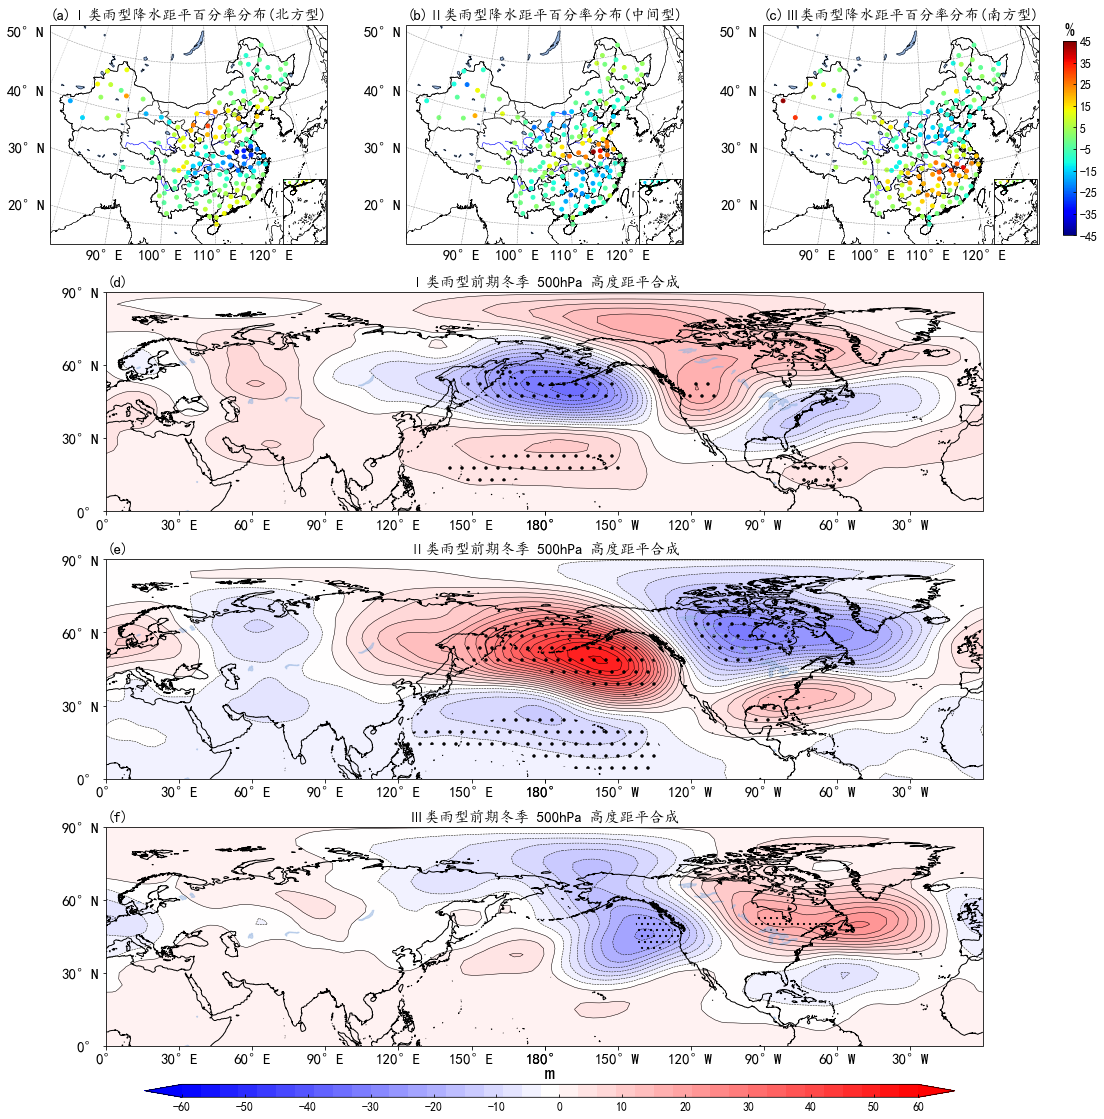

In [142]:
from scipy.stats.mstats import ttest_ind
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.ticker as mticker
#防止中文出错
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus'] = False

#6月份降水
f_pre_6 = pd.read_csv(r"D:\data\short_term_climate_class\sx05\r1606.txt",
                      sep="\s+",
                      header=None)
pre_6 = np.array(f_pre_6).reshape(71, 160)
#7月份降水
f_pre_7 = pd.read_csv(r"D:\data\short_term_climate_class\sx05\r1607.txt",
                      sep="\s+",
                      header=None)
pre_7 = np.array(f_pre_7).reshape(71, 160)
#8月份降水
f_pre_8 = pd.read_csv(r"D:\data\short_term_climate_class\sx05\r1608.txt",
                      sep="\s+",
                      header=None)
pre_8 = np.array(f_pre_8).reshape(71, 160)

pre = ((pre_6 + pre_7 + pre_8) / 3.)[0:55, :]
#高度
f_hgt = xr.open_dataset(
    r"D:\data\short_term_climate_class\sx05\hgt.mon.mean.nc")
#500hPa
z = f_hgt.hgt.loc[f_hgt.time.dt.month.isin(
    [12, 1,2])].loc['1950-12-01':'2005-02-01',500, 90:0, :]
#站点
sta = pd.read_csv(r"D:\data\short_term_climate_class\sx05\zd.txt",
                  sep="\s+",
                  header=None,
                  names=['station', 'lat', 'lon'])
type_1_year=np.array([1953,1958,1959,1960,1961,1964,1966,1967,1973,1976,
                      1977,1978,1981,1985,1988,1992,1994,1995,2001,2004])
type_2_year=np.array([1956,1957,1962,1963,1965,1971,1972,1975,1979,1982,
                      1984,1989,1990,1991,2000,2003,2005])
type_3_year=np.array([1951,1952,1954,1955,1968,1969,1970,1974,1980,1983,
                      1986,1987,1993,1996,1997,1998,1999,2002])

#计算雨型
def cal_pre(type_year, pre):
    type_year_pre = pre[type_year - 1951]
    ave_pre = np.tile((pre[0:50, :]).mean(0), (type_year_pre.shape[0], 1))
    pre_per = ((type_year_pre - ave_pre) / ave_pre).mean(0)
    return pre_per


pre_per_1 = cal_pre(type_1_year, pre)
pre_per_2 = cal_pre(type_2_year, pre)
pre_per_3 = cal_pre(type_3_year, pre)


#计算500hPa合成 并 T检验
def cal_hgt(type_year, z):
    ave_z = (np.array(z).reshape(-1, 3, 37, 144).mean(1)).mean(0)
    hgt = z.loc[((z.time.dt.month.isin([1, 2])) &
                 (z.time.dt.year.isin(type_year))) |
                ((z.time.dt.month.isin([12])) &
                 (z.time.dt.year.isin(type_year - 1)))]
    hgt_winter = (np.array(hgt).reshape(-1, 3, 37, 144).mean(1)).mean(0)
    hgt_jp = hgt_winter - ave_z
    #T检验
    _, p_hgt = ttest_ind(hgt, z, equal_var=False)
    return hgt_jp, p_hgt

hgt_1_winter, p_hgt_1 = cal_hgt(type_1_year, z)
hgt_2_winter, p_hgt_2 = cal_hgt(type_2_year, z)
hgt_3_winter, p_hgt_3 = cal_hgt(type_3_year, z)

#散点底图
def Lbt_map(ax, extent, mark=1):
    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE, lw=0.3)
    ax.add_feature(cfeature.LAKES.with_scale('50m'))
    ax.add_geometries(Reader(r"D:\data\china_map\river1.shp").geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='b',
                      linewidth=0.6)
    ax.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='k',
                      linewidth=0.5)
    ax.add_geometries(Reader(r"D:\data\map\bou2_4l.shp").geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='k',
                      linewidth=0.7)
    ax.add_geometries(
        Reader(r'D:\data\china_map\ne_10m_land.shp').geometries(),
        ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='k',
        linewidth=0.5)
    ax.add_geometries(
        Reader(r'D:\data\china_map\ne_50m_lakes.shp').geometries(),
        ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='k',
        linewidth=0.5)
    if mark == 1:
        lb = ax.gridlines(draw_labels=None,
                          x_inline=False,
                          y_inline=False,
                          linewidth=0.5,
                          color='gray',
                          alpha=0.5,
                          linestyle='--')
        lb.xlocator = mticker.FixedLocator(range(0, 180, 10))
        lb.ylocator = mticker.FixedLocator(range(0, 90, 10))
        lb = ax.gridlines(draw_labels=True,
                          x_inline=False,
                          y_inline=False,
                          linewidth=0.5,
                          color='gray',
                          alpha=0.5,
                          linestyle='--')
        lb.top_labels = False
        lb.right_labels = None
        lb.xlocator = mticker.FixedLocator(range(90, 130, 10))
        lb.ylocator = mticker.FixedLocator(range(10, 60, 10))
        lb.ylabel_style = {'size': 15, 'color': 'k'}
        lb.xlabel_style = {'size': 15, 'color': 'k'}
        lb.rotate_labels = False
    else:
        pass

def contour_map(fig, img_extent, spec):  # 画布，经纬度范围，步长
    fig.set_ylim((lowerlat, upperlat))
    fig.set_xlim((leftlon, rightlon))
    #fig.set_extent(img_extent, crs=ccrs.PlateCarree())
    fig.add_feature(cfeature.COASTLINE.with_scale('50m'))  # 添加海岸线
    fig.add_feature(cfeature.LAKES, alpha=0.5)  # 添加湖泊
    # 添加经纬度
    fig.set_xticks(np.arange(leftlon, rightlon + spec, spec),
                   crs=ccrs.PlateCarree())
    fig.set_yticks(np.arange(lowerlat, upperlat + spec, spec),
                   crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    fig.xaxis.set_major_formatter(lon_formatter)
    fig.yaxis.set_major_formatter(lat_formatter)
    plt.xticks(fontsize=15)  # 设置标签大小
    plt.yticks(fontsize=15)


def cycle_data(hgt_jp, z):
    chgt, cycle_lon = add_cyclic_point(hgt_jp, coord=z.lon)
    LON, LAT = np.meshgrid(cycle_lon, z.lat)
    return LON, LAT, chgt

c_hgt_1_lon, c_hgt_1_lat, c_hgt_1 = cycle_data(hgt_1_winter, z)
c_hgt_2_lon, c_hgt_2_lat, c_hgt_2 = cycle_data(hgt_2_winter, z)
c_hgt_3_lon, c_hgt_3_lat, c_hgt_3 = cycle_data(hgt_3_winter, z)

leftlon, rightlon, lowerlat, upperlat = (-180, 180, 0, 90)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lev = np.arange(-60, 60, 3)
#画布
fig = plt.figure(figsize=(15, 15))
#降水
map = ccrs.LambertConformal(central_longitude=105)

ax1 = fig.add_subplot(4, 3, 1, projection=map)
Lbt_map(ax1, [80, 130, 15, 55], 1)
c11 = ax1.scatter(sta["lon"],
                  sta["lat"],
                  vmin=-45,
                  vmax=45,
                  s=15,
                  c=pre_per_1 * 100,
                  cmap='jet',
                  transform=ccrs.PlateCarree())
ax1.set_title('Ⅰ类雨型降水距平百分率分布(北方型)', loc='right', fontsize=15)
ax1.set_title('(a)', loc='left', fontsize=15)

ax2 = fig.add_subplot(4, 3, 2, projection=map)
Lbt_map(ax2, [80, 130, 15, 55], 1)
ax2.scatter(sta["lon"],
            sta["lat"],
            vmin=-45,
            vmax=45,
            s=15,
            c=pre_per_2 * 100,
            cmap='jet',
            transform=ccrs.PlateCarree())
ax2.set_title('Ⅱ类雨型降水距平百分率分布(中间型)', loc='right', fontsize=15)
ax2.set_title('(b)', loc='left', fontsize=15)

ax3 = fig.add_subplot(4, 3, 3, projection=map)
Lbt_map(ax3, [80, 130, 15, 55], 1)
ax3.scatter(sta["lon"],
            sta["lat"],
            vmin=-45,
            vmax=45,
            s=15,
            c=pre_per_3 * 100,
            cmap='jet',
            transform=ccrs.PlateCarree())
ax3.set_title('Ⅲ类雨型降水距平百分率分布(南方型)', loc='right', fontsize=15)
ax3.set_title('(c)', loc='left', fontsize=15)

ax = fig.add_axes([0.98, 0.778, 0.012, 0.18])
cbar = plt.colorbar(c11, cax=ax)
cbar.ax.tick_params(labelsize=12, direction='in')
cbar.set_ticks(np.arange(-45, 45.1, 10))
cbar.ax.set_title('%', fontsize=20)

#南海
ax_nh1 = fig.add_axes([0.208, 0.770, 0.14, 0.06],
                      projection=ccrs.PlateCarree())
ax_nh1.scatter(sta["lon"],
               sta["lat"],
               vmin=-45,
               vmax=45,
               s=5,
               c=pre_per_1 * 100,
               cmap='jet',
               transform=ccrs.PlateCarree())
Lbt_map(ax_nh1, [106, 122, 0, 24], 0)

ax_nh2 = fig.add_axes([0.537, 0.770, 0.14, 0.06],
                      projection=ccrs.PlateCarree())
ax_nh2.scatter(sta["lon"],
               sta["lat"],
               vmin=-45,
               vmax=45,
               s=5,
               c=pre_per_2 * 100,
               cmap='jet',
               transform=ccrs.PlateCarree())
Lbt_map(ax_nh2, [106, 122, 0, 24], 0)

ax_nh3 = fig.add_axes([0.866, 0.770, 0.14, 0.06],
                      projection=ccrs.PlateCarree())
ax_nh3.scatter(sta["lon"],
               sta["lat"],
               vmin=-45,
               vmax=45,
               s=5,
               c=pre_per_3 * 100,
               cmap='jet',
               transform=ccrs.PlateCarree())
Lbt_map(ax_nh3, [106, 122, 0, 24], 0)

#500hPa
proj=ccrs.PlateCarree(central_longitude=180)
f_ax1 = fig.add_subplot(4, 1, 2, projection=proj)
c1 = f_ax1.contourf(c_hgt_1_lon,
                    c_hgt_1_lat,
                    c_hgt_1,
                    levels=lev,
                    cmap='bwr',
                    transform=ccrs.PlateCarree())
f_ax1.contour(c1, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())
c1p = f_ax1.contourf(z.lon,
                     z.lat,
                     p_hgt_1,
                     levels=[0, 0.05, 1],
                     hatches=['.', None],
                     colors="none",
                     transform=ccrs.PlateCarree())
contour_map(f_ax1, img_extent, 30)
f_ax1.set_title('Ⅰ类雨型前期冬季 500hPa 高度距平合成', fontsize=15)
f_ax1.set_title('(d)', loc='left', fontsize=15)

f_ax2 = fig.add_subplot(4, 1, 3, projection=proj)
c2 = f_ax2.contourf(c_hgt_2_lon,
                    c_hgt_2_lat,
                    c_hgt_2,
                    levels=lev,
                    cmap='bwr',
                    transform=ccrs.PlateCarree())
f_ax2.contour(c2, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())
c2p = f_ax2.contourf(z.lon,
                     z.lat,
                     p_hgt_2,
                     levels=[0, 0.05, 1],
                     hatches=['.', None],
                     colors="none",
                     transform=ccrs.PlateCarree())
contour_map(f_ax2, img_extent, 30)
f_ax2.set_title('Ⅱ类雨型前期冬季 500hPa 高度距平合成', fontsize=15)
f_ax2.set_title('(e)', loc='left', fontsize=15)

f_ax3 = fig.add_subplot(4, 1, 4, projection=proj)
c3 = f_ax3.contourf(c_hgt_3_lon,
                    c_hgt_3_lat,
                    c_hgt_3,
                    levels=lev,
                    cmap='bwr',
                    transform=ccrs.PlateCarree(),
                    extend='both')
f_ax3.contour(c3, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())
c3p = f_ax3.contourf(z.lon,
                     z.lat,
                     p_hgt_3,
                     levels=[0, 0.05, 1],
                     hatches=['..', None],
                     colors="none",
                     transform=ccrs.PlateCarree())
contour_map(f_ax3, img_extent, 30)
f_ax3.set_title('Ⅲ类雨型前期冬季 500hPa 高度距平合成', fontsize=15)
f_ax3.set_title('(f)', loc='left', fontsize=15)

axc = fig.add_axes([0.13, -0.02, 0.75, 0.012])
cbar = plt.colorbar(c3, cax=axc, orientation='horizontal')
cbar.ax.tick_params(labelsize=12, direction='in')
cbar.set_ticks(np.arange(-60, 60.1, 10))
cbar.ax.set_title('m', fontsize=20)

plt.tight_layout()
plt.savefig(r'D:\data\short_term_climate_class\sx05\pre.jpg',
            dpi=300,
            bbox_inches='tight')
plt.show()

## 最后修改为 2022-05-14-21:14
## 若有错误请联系 845728580@qq.com 订正

In [81]:
import pandas as pd
sta= pd.read_csv(r"D:\data\short_term_climate_class\sx04\readme.txt",skiprows=21,usecols=np.arange(2,7),sep="\t",encoding="gbk",names=['number','station_name','station_number','lat','lon'])
sta.number[116]

117

In [36]:
station = pd.read_csv(r"D:\data\short_term_climate_class\sx04\readme.txt", skiprows=20, usecols=np.arange(2, 7), sep='\t',encoding='gbk')
station

,number,name,number,LAT,LON
0,1,呼 玛,50353,51.72,126.65
1,2,博 克 图,50632,48.77,121.92
2,3,海 拉 尔,50527,49.22,119.75
3,4,图 里 河,50434,50.45,121.70
4,5,嫩 江,50557,49.17,125.23
...,...,...,...,...,...
155,156,阿 勒 泰,51076,47.73,88.08
156,157,塔 城,51133,46.73,83.00
157,158,乌 苏,51346,44.43,84.66
158,159,伊 宁,51431,43.95,81.33


In [24]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=None, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=None, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression: 'CompressionOptions' = 'infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_li

In [ ]:
#散点底图
def Lbt_map(ax, extent, mark=1):
    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE, lw=0.3)
    ax.add_feature(cfeature.LAKES.with_scale('50m'))
    ax.add_geometries(Reader(r"D:\data\china_map\river1.shp").geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='b',
                      linewidth=0.6)
    ax.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='k',
                      linewidth=0.5)
    ax.add_geometries(Reader(r"D:\data\map\bou2_4l.shp").geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='k',
                      linewidth=0.7)
    ax.add_geometries(
        Reader(r'D:\data\china_map\ne_10m_land.shp').geometries(),
        ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='k',
        linewidth=0.5)
    ax.add_geometries(
        Reader(r'D:\data\china_map\ne_50m_lakes.shp').geometries(),
        ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='k',
        linewidth=0.5)
    if mark == 1:
        lb = ax.gridlines(draw_labels=None,
                          x_inline=False,
                          y_inline=False,
                          linewidth=0.5,
                          color='gray',
                          alpha=0.5,
                          linestyle='--')
        lb.xlocator = mticker.FixedLocator(range(0, 180, 10))
        lb.ylocator = mticker.FixedLocator(range(0, 90, 10))
        lb = ax.gridlines(draw_labels=True,
                          x_inline=False,
                          y_inline=False,
                          linewidth=0.5,
                          color='gray',
                          alpha=0.5,
                          linestyle='--')
        lb.top_labels = False
        lb.right_labels = None
        lb.xlocator = mticker.FixedLocator(range(90, 130, 10))
        lb.ylocator = mticker.FixedLocator(range(10, 60, 10))
        lb.ylabel_style = {'size': 15, 'color': 'k'}
        lb.xlabel_style = {'size': 15, 'color': 'k'}
        lb.rotate_labels = False
    else:
        pass
